In [1]:
from sklearn.manifold import MDS, TSNE, Isomap
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll, make_circles
from umap import UMAP

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn')

%matplotlib inline

In [2]:
transformers = [
    (MDS(), 'MDS()'),
    (PCA(n_components=2),'PCA(n_components=2)'),

    (TSNE(perplexity=10), 'TSNE(perplexity=10)'),
    (TSNE(perplexity=35), 'TSNE(perplexity=35),'),
    
    (Isomap(n_neighbors=5), 'Isomap(n_neighbors=5)'),
    (Isomap(n_neighbors=11), 'Isomap(n_neighbors=11)'),
    
    (UMAP(n_neighbors=5), 'UMAP(n_neighbors=5)'),
    (UMAP(n_neighbors=15), 'UMAP(n_neighbors=15)')
]

def transform(transformer, df):
    data = transformer.fit_transform(df.values)
    data_df = pd.DataFrame(data)
    data_df.columns = ['x', 'y']
    data_df.index = df.index
    return data_df

## Zbiór danych cars

In [3]:
cars_df = pd.read_csv('cars.csv', header=None, index_col=0)
cars_df.index = cars_df.index.str.strip("''")
cars_df.index.name = 'model'
cars_df

,1,2,3,4
model,,,,
Alfa Romeo 156,8.1,9.3,71.135,9
Audi A4,7.9,11.9,93.351,10
BMW 316l,7.5,12.3,81.787,8
Daewoo Lanos,8.4,12.2,34.900,3
Honda Civic,6.7,10.8,48.900,7
Hyunday Accent,6.4,11.7,35.300,2
Lada Samara,7.2,13.0,24.900,2
Mitsubishi Carisma,7.2,12.0,60.600,9
Opel Astra II,7.0,12.0,56.950,8


C:\Users\Bartek\Anaconda3\envs\swd_labs\lib\site-packages\umap\umap_.py:2213: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


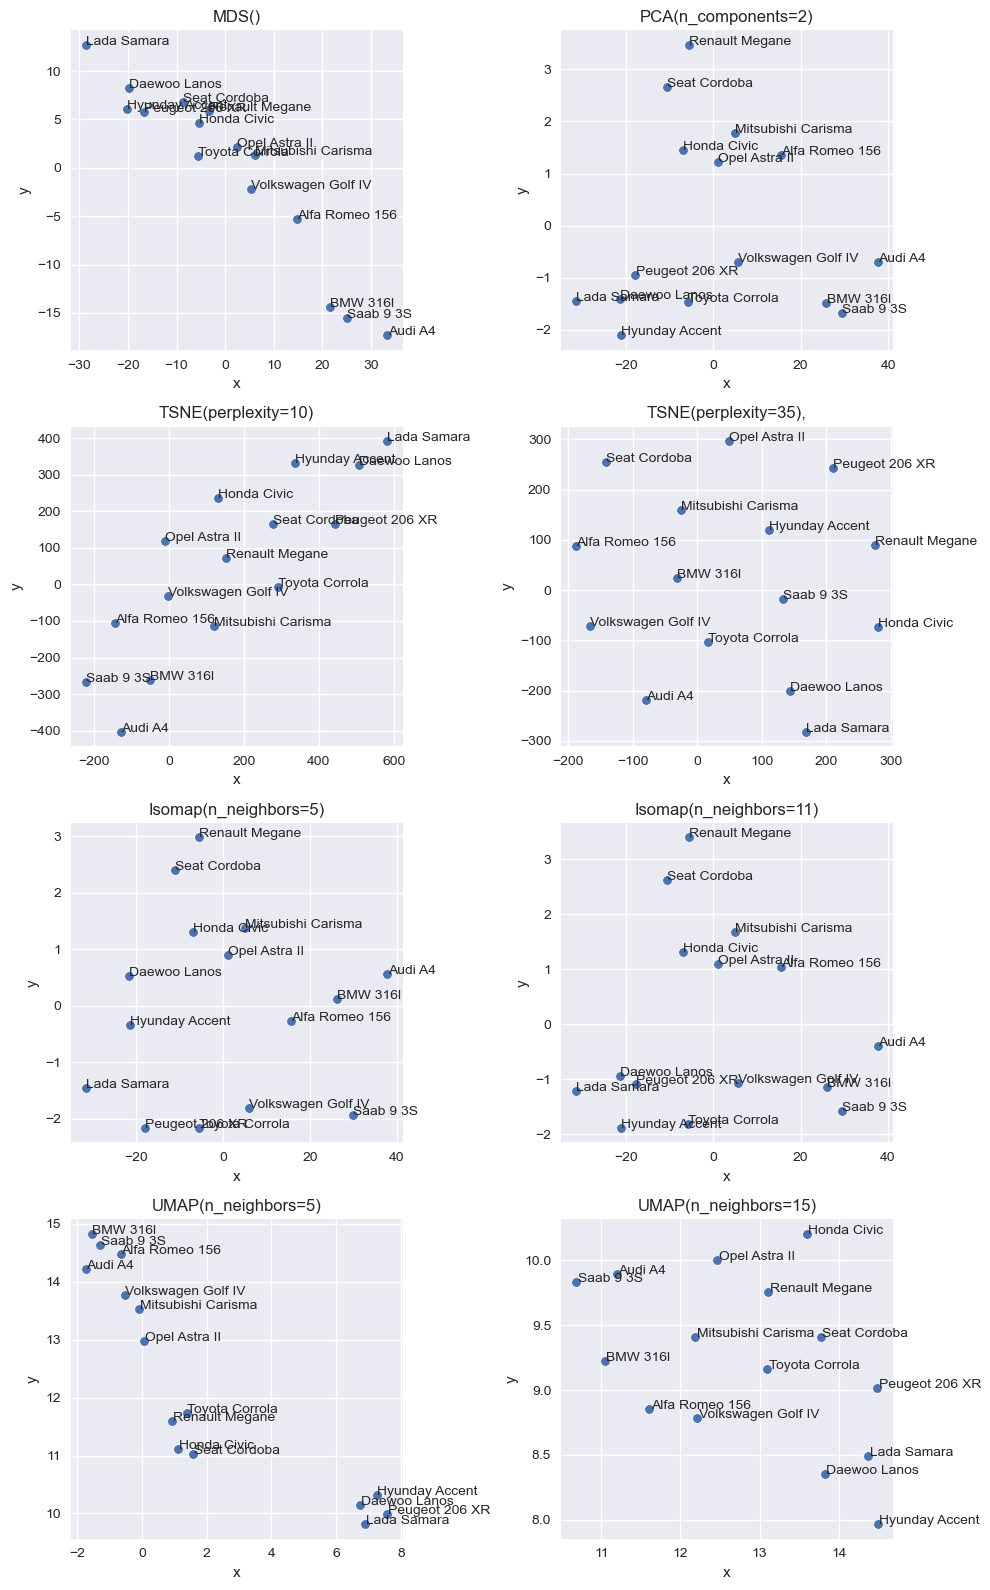

In [4]:
fig, axs = plt.subplots(4, 2, figsize=(10, 16), dpi=100)

def plot_cars(transformer, ax):
    transformer, title = transformer
    
    df = transform(transformer, cars_df)
    sns.scatterplot(data=df, x='x', y='y', ax=ax)
    ax.set(title=title)
    
    for name, point in df.iterrows():
        ax.text(point['x']+.02, point['y'], name)
    
for ax, transformer in zip(axs.ravel(), transformers):
    plot_cars(transformer, ax)
    
fig.tight_layout()

## Zbiór danych Swiss Roll

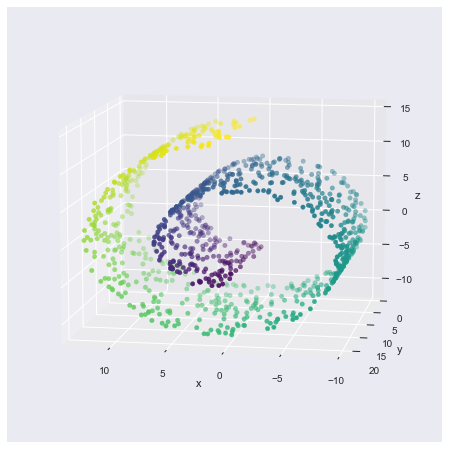

In [5]:
swiss_roll_df, index = make_swiss_roll(1000)
swiss_roll_df = pd.DataFrame(swiss_roll_df, index=index)
swiss_roll_df.columns = ['x', 'y', 'z']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(swiss_roll_df.x, swiss_roll_df.y, swiss_roll_df.z, c=swiss_roll_df.index, cmap='viridis')
ax.view_init(10, 100)

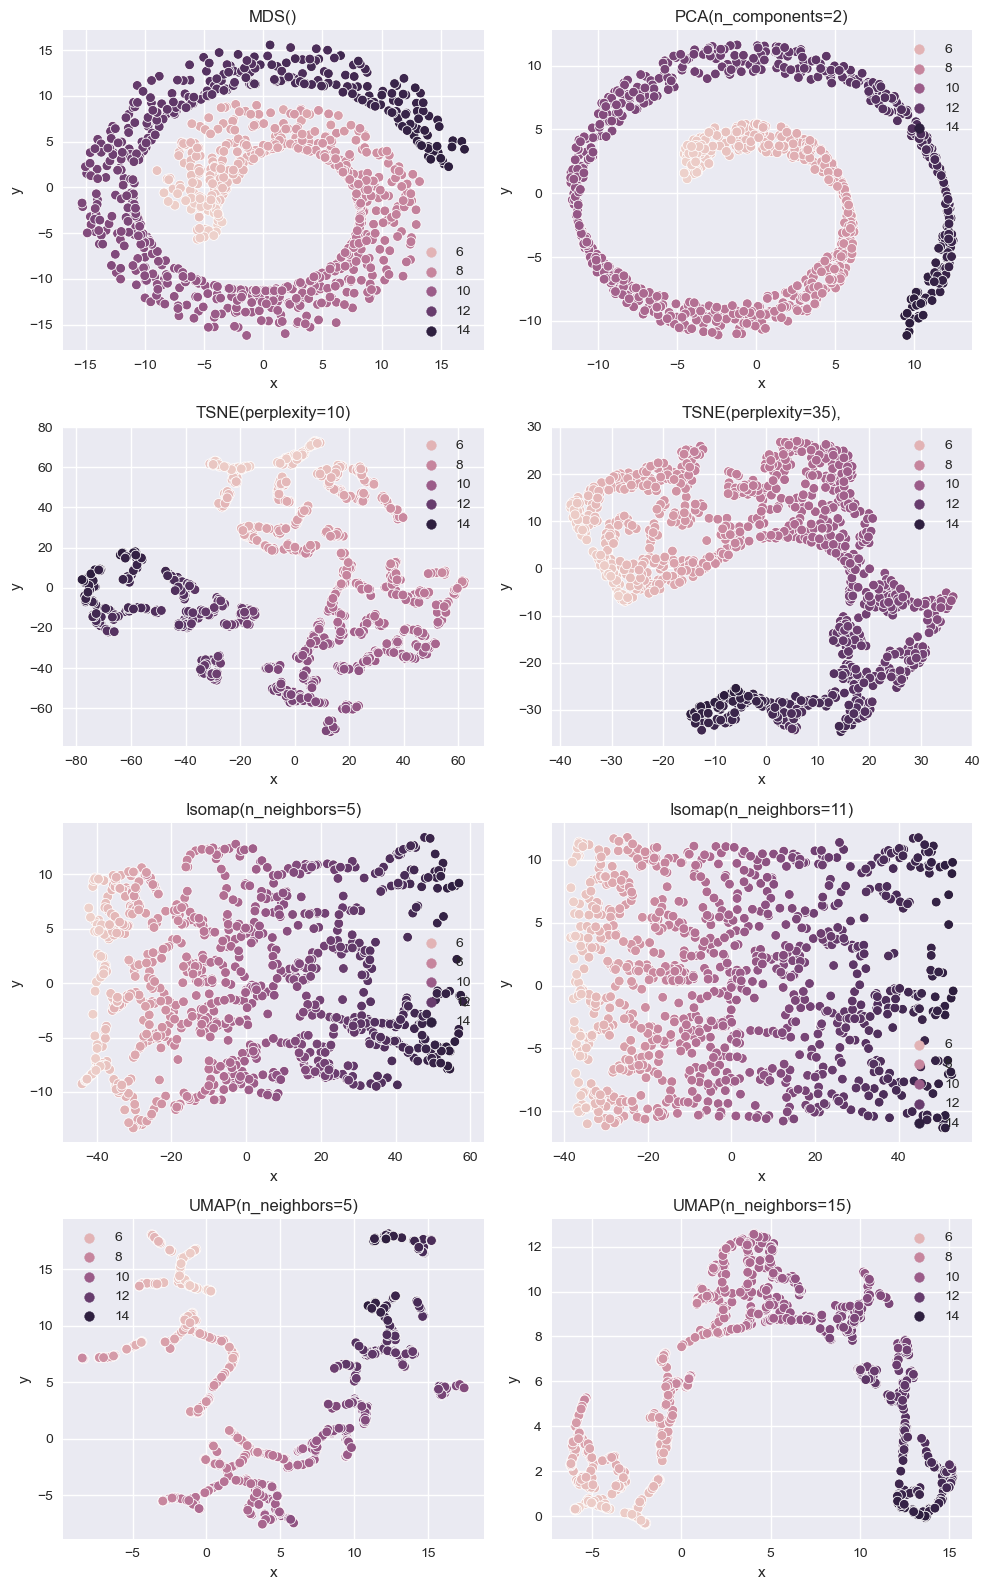

In [6]:
fig, axs = plt.subplots(4, 2, figsize=(10, 16), dpi=100)

def plot_swiss_roll(transformer, ax):
    transformer, title = transformer
    
    df = transform(transformer, swiss_roll_df)
    sns.scatterplot(data=df, x='x', y='y', hue=df.index, ax=ax)
    ax.set(title=title)
        
for ax, transformer in zip(axs.ravel(), transformers):
    plot_swiss_roll(transformer, ax)
    
fig.tight_layout()

## Zbiór danych circles

<AxesSubplot:xlabel='x', ylabel='y'>

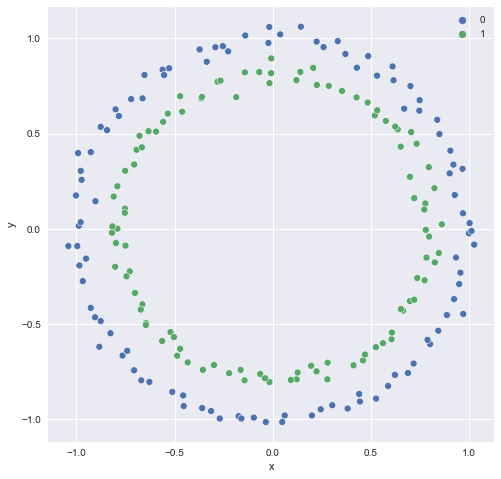

In [7]:
circles_df, index = make_circles(200, shuffle=True, noise=0.03)
circles_df = pd.DataFrame(circles_df, index=index)
circles_df.columns = ['x', 'y']

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

sns.scatterplot(data=circles_df, x='x', y='y', hue=circles_df.index, ax=ax)

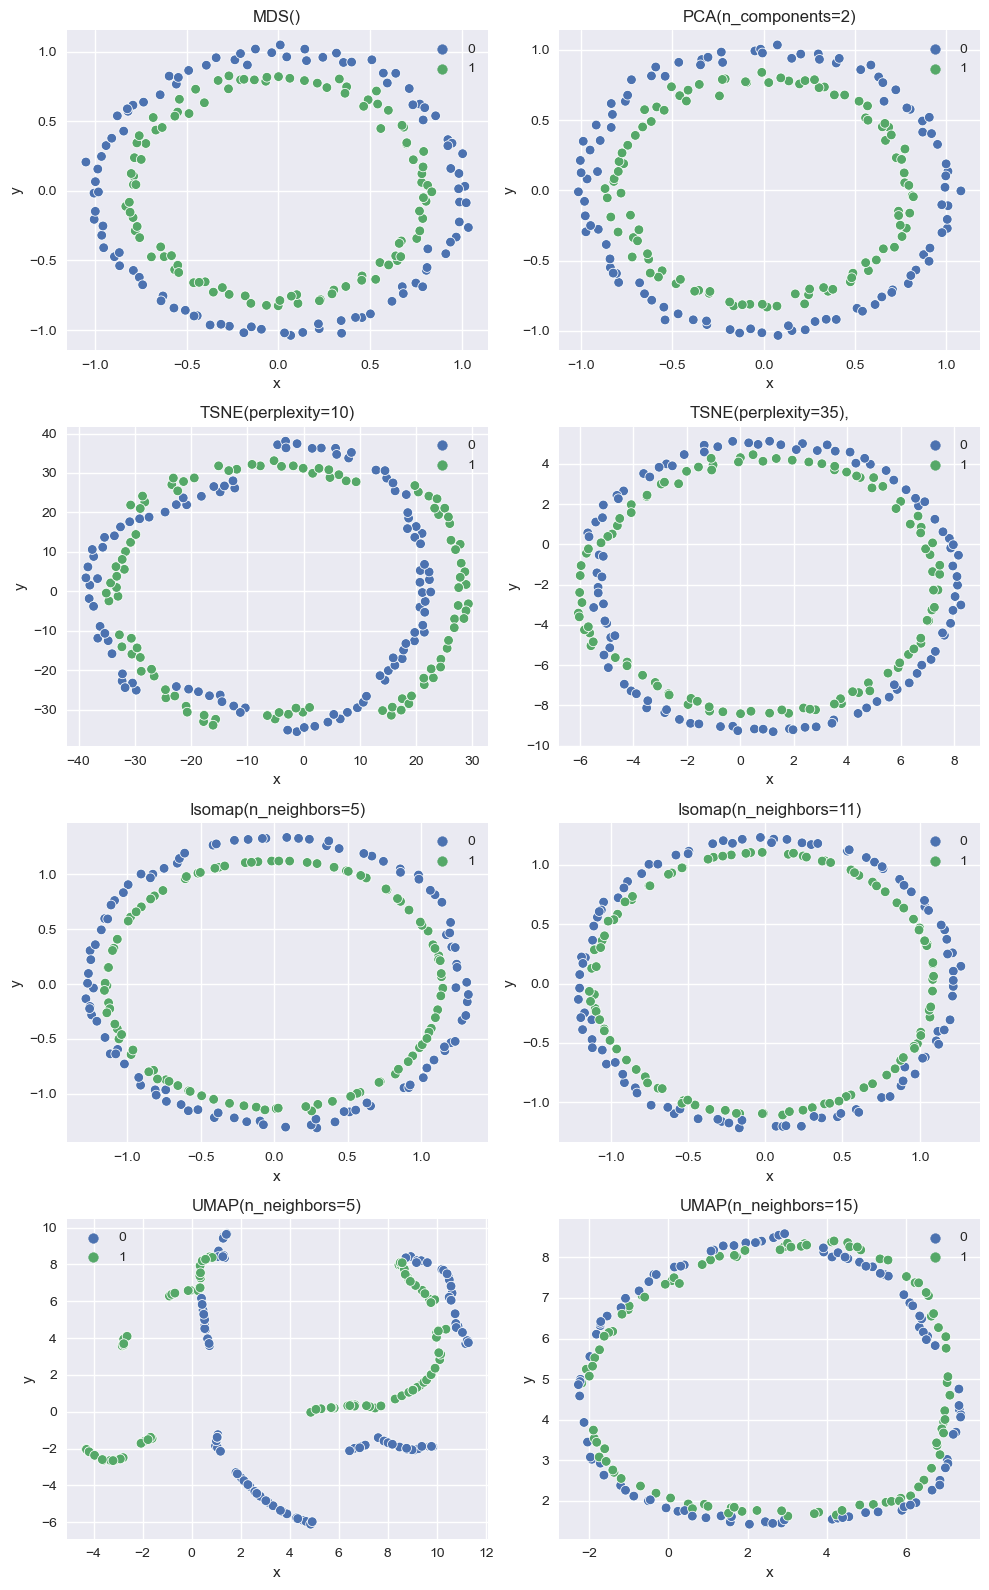

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(10, 16), dpi=100)

def plot_circles(transformer, ax):
    transformer, title = transformer
    
    df = transform(transformer, circles_df)
    sns.scatterplot(data=df, x='x', y='y', hue=df.index, ax=ax)
    ax.set(title=title)
        
for ax, transformer in zip(axs.ravel(), transformers):
    plot_circles(transformer, ax)
    
fig.tight_layout()

## Zbiór danych diamonds

In [18]:
diamonds_df = sns.load_dataset("diamonds")

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
diamonds_df = diamonds_df.select_dtypes(include=numerics)
diamonds_df.set_index('price', inplace=True)

diamonds_df = diamonds_df.sample(1000, random_state=42)
print(diamonds_df.shape)
diamonds_df.head(5)

(1000, 6)


,carat,depth,table,x,y,z
price,,,,,,
559,0.24,62.1,56.0,3.97,4.00,2.47
2201,0.58,60.0,57.0,5.44,5.42,3.26
1238,0.40,62.1,55.0,4.76,4.74,2.95
1304,0.43,60.8,57.0,4.92,4.89,2.98
6901,1.55,62.3,55.0,7.44,7.37,4.61


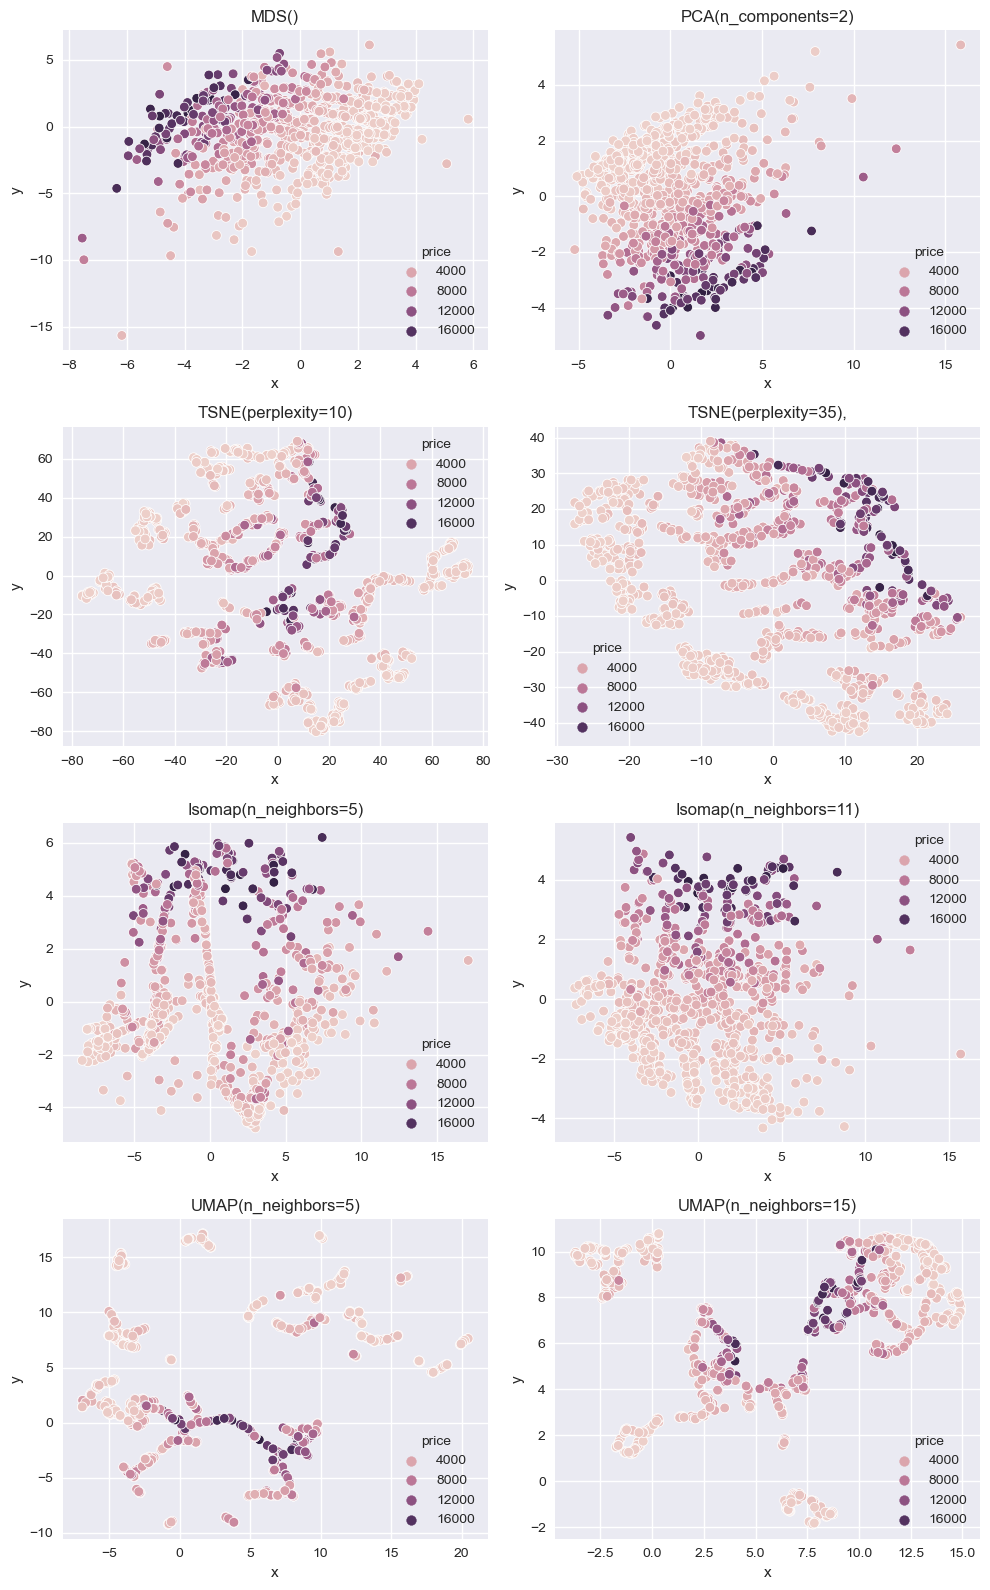

In [19]:
fig, axs = plt.subplots(4, 2, figsize=(10, 16), dpi=100)

def plot_diamonds(transformer, ax):
    transformer, title = transformer
    
    df = transform(transformer, diamonds_df)
    sns.scatterplot(data=df, x='x', y='y', hue=df.index, ax=ax)
    ax.set(title=title)
        
for ax, transformer in zip(axs.ravel(), transformers):
    plot_diamonds(transformer, ax)
    
fig.tight_layout()